In [1]:
import numpy as np
import matplotlib.pyplot as plt

import CorrectnessMetricUtils as cmu
import ErrorMetricsUtils as emu
from AuxUtils import train_test_split, normalize, minkowski_distance, standardize, cross_val_split
from PriorUtils import KNN

from csv import reader
from random import seed
from random import randrange

# Get CSV file
def get_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        data = reader(file)
        for row in data:
            if not row:
                continue
            dataset.append(row)
    return dataset

# String to float columnwise
def str_to_float_col(dataset, col):
    for row in dataset:
        row[col] = float(row[col].strip())

In [2]:
seed(1)
filename = 'bc.csv'
dataset = get_csv(filename)
dataset.remove(dataset[0])
for i in range(len(dataset[0])):
    str_to_float_col(dataset, i)
dataset = np.asarray(dataset)
featureset = np.delete(dataset, 3, axis=1)
target = dataset.T[3]

In [3]:
x = normalize(standardize(featureset))
y = target
obs_label = 1
train_accuracy = list()
test_accuracy = list()
Pscores = list()
Rscores = list()
Fscores = list()
Sscores = list()
for i in range(5):
    x_train, x_test, y_train, y_test = cross_val_split(x, y, 5)[i]
    model_knn = KNN(k=10)
    y_test_hat = model_knn.predict(x_test, x_train, y_train)
    y_train_hat = model_knn.predict(x_train, x_train, y_train)
    train_accuracy.append(cmu.accuracy_calc(y_train, y_train_hat))
    test_accuracy.append(cmu.accuracy_calc(y_test, y_test_hat))
    Pscores.append(cmu.precision_calc(obs_label, y_test, y_test_hat))
    Rscores.append(cmu.recall_calc(obs_label, y_test, y_test_hat))
    Fscores.append(cmu.f1_calc(obs_label, y_test, y_test_hat))
    Sscores.append(cmu.specificity_calc(obs_label,y_test, y_test_hat))
print("Mean Train Accuracy:", np.mean(train_accuracy))
print("Mean Test Accuracy:", np.mean(test_accuracy))
print("Mean Precision:", np.mean(Pscores))
print("Mean Recall:", np.mean(Rscores))
print("Mean F1 score:", np.mean(Fscores))
print("Mean Specificity:", np.mean(Sscores))

Mean Train Accuracy: 0.8717857142857144
Mean Test Accuracy: 0.7957142857142857
Mean Precision: 0.7722633650502502
Mean Recall: 0.7778976333726665
Mean F1 score: 0.7725298055916847
Mean Specificity: 0.8150940353179159


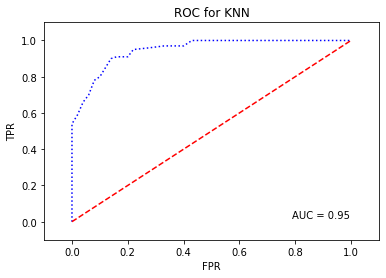

In [4]:
x = normalize(standardize(featureset))
y = target
obs_label = 1
TPR = list()
FPR = list()
k = 1
while(k<(len(dataset))/50):
    Rscores = list()
    Sscores = list()
    for i in range(5):
        x_train, x_test, y_train, y_test = cross_val_split(x, y, 5)[i]
        model_knn = KNN(k)
        y_test_hat = model_knn.predict(x_test, x_train, y_train)
        Rscores.append(cmu.recall_calc(obs_label, y_test, y_test_hat))
        Sscores.append(cmu.specificity_calc(obs_label,y_test, y_test_hat))
    TPR.append(np.mean(Rscores))
    FPR.append(1-np.mean(Sscores))
    k += 1

#plotting ROC

auc = np.trapz(TPR, FPR)
plt.plot(FPR, TPR, 'b:')
plt.plot([0, 1], [0, 1],'r--')
plt.figtext(0.7,0.2,'AUC = %0.2f' % auc)
plt.title('ROC for KNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.draw()
plt.show()